In [19]:
# OPERATIONAL PACKAGES ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import inf
import scipy as sp

# STYLE RESOURCES ---------------------------------------
plt.style.reload_library()
plt.style.use(['science', 'grid'])

# FITTING PACKAGES ---------------------------------------
from lmfit import Model, Parameters

In [81]:
# FUNCTION FOR PLOTTING A SCATTER PLOT ---------------------------------------
def ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label):
    
    # SCATTER PLOT
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    title = r'$\textbf{' + y_label + ' vs ' + x_label + '}$'
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD ---------------------------------------
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

# DEFINING A FUNCTION THAT CALCULATES THE RESISTANCE HAVING VOLTAGE AND CURRENT AS INPUTS ---------------------------------------
calculate_R = lambda param : param[0]/param[1] # param = [V, I]

# DEFINING THE SIGMOID FUNCTION ---------------------------------------
Sigmoid = lambda x, L ,x0, k : L/(1 + np.exp(-k*(x-x0))) 
# L: Height, k: steepness, x0: center

def FUNCTION_FIT(xdata, ydata, error_x, error_y, color, x_label, y_label, function):
    
    # Plotting scatter plot first
    ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label)
    
    # Fitting data using LMFIT
    gModel = Model(function)
    L ,x0, k = ydata.max(), np.median(xdata), 1 # Initial guess
    gModel.set_param_hint('L', value=L, min=0, max=inf)
    gModel.set_param_hint('x0', value=x0, min=0, max=inf)
    gModel.set_param_hint('k', value=k, min=0, max=inf)
    params = gModel.make_params()
    result = gModel.fit(ydata, x=xdata, L=L, x0=x0, k=k, weights=1/error_y)
    
    # Plotting Fitted Function
    L ,x0, k = result.params['L'].value, result.params['x0'].value, result.params['k'].value
    dx0 = result.params['x0'].stderr
    label = r'$\textit{(' + str("{:.5}".format(x0)) + '±' + str("{:.2}".format(dx0)) + ') K}$'
    #plt.plot(xdata,result.best_fit, color=color)
    x = np.arange(xdata.min(), xdata.max(), (xdata.max()-xdata.min())/1000) 
    plt.plot(x, function(x, L ,x0, k), color=color)
        
    #VERTICAL LINE 
    plt.axvline(x=x0, color='k', linestyle='--', label=label)
    plt.legend(prop={'size': 12}, loc=2)
    plt.savefig("Figures/figure.png")
    plt.show()
    
    # CALCULATING THE P-VALUE
    print('Corresponding p-value:',1.000-sp.stats.chi2.cdf(result.chisqr,result.nfree))
    print('Degrees of freedom:',result.nfree)
    return result   

***
### <font color=green>BUCKET 1</font>
***

### Cooling 1

### Warming 1

In [96]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1nEmzrUnEoUVvY7IwUPwiF5Lh4ofI0ZTwf0R9cI0LgEQ'
workSheetName = 'Warming_1'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :4]

# ADDING UNCERTAINTIES ---------------------------------------
df['$\Delta$ V (mV)'], df['$\Delta$ I (mA)'], df['$\Delta$ T (K)'] = 0.01, 0.01, 0.01
df['$\Delta$ R ($\Omega$)'] = df.apply(lambda x: uncertainty_var([x['Voltage (mV)'], x['I (mA)']], [x['$\Delta$ V (mV)'], x['$\Delta$ I (mA)']], calculate_R), axis=1)
df.head(5)

,Voltage (mV),I (mA),Resistance ($\Omega$),Temperature (K),$\Delta$ V (mV),$\Delta$ I (mA),$\Delta$ T (K),$\Delta$ R ($\Omega$)
0,54.4712,101.5421,0.536440,82.45,0.01,0.01,0.01,0.000112
1,54.8408,101.5341,0.540122,85.65,0.01,0.01,0.01,0.000112
2,55.4016,101.5260,0.545689,90.73,0.01,0.01,0.01,0.000112
3,56.2005,101.5204,0.553588,95.68,0.01,0.01,0.01,0.000113
4,59.4288,101.4836,0.585600,100.64,0.01,0.01,0.01,0.000114


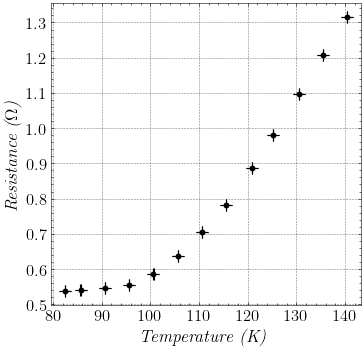

In [97]:
# PLOTTING OUR DATA
xdata, ydata, error_x, error_y = df['Temperature (K)'], df['Resistance ($\Omega$)'], df['$\Delta$ T (K)'], df['$\Delta$ R ($\Omega$)']
ScatterPlot(xdata, ydata, error_x, error_y, 'purple', 'Temperature (K)', 'Resistance ($\Omega$)')

### Cooling 2

In [103]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1nEmzrUnEoUVvY7IwUPwiF5Lh4ofI0ZTwf0R9cI0LgEQ'
workSheetName = 'Cooling_2'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :4]

# ADDING UNCERTAINTIES ---------------------------------------
df['$\Delta$ V (mV)'], df['$\Delta$ I (mA)'], df['$\Delta$ T (K)'] = 0.01, 0.01, 0.01
df['$\Delta$ R ($\Omega$)'] = df.apply(lambda x: uncertainty_var([x['Voltage (mV)'], x['I (mA)']], [x['$\Delta$ V (mV)'], x['$\Delta$ I (mA)']], calculate_R), axis=1)
df.head(5)

,Voltage (mV),I (mA),Resistance ($\Omega$),Temperature (K),$\Delta$ V (mV),$\Delta$ I (mA),$\Delta$ T (K),$\Delta$ R ($\Omega$)
0,147.458,100.6402,1.465200,145.23,0.01,0.01,0.01,0.000176
1,142.665,100.6892,1.416885,142.40,0.01,0.01,0.01,0.000172
2,140.778,100.7073,1.397893,140.58,0.01,0.01,0.01,0.000171
3,139.100,100.7267,1.380965,137.97,0.01,0.01,0.01,0.000169
4,137.881,100.7404,1.368676,135.72,0.01,0.01,0.01,0.000168


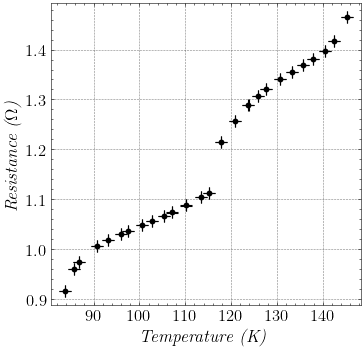

In [104]:
# PLOTTING OUR DATA
xdata, ydata, error_x, error_y = df['Temperature (K)'], df['Resistance ($\Omega$)'], df['$\Delta$ T (K)'], df['$\Delta$ R ($\Omega$)']
ScatterPlot(xdata, ydata, error_x, error_y, 'purple', 'Temperature (K)', 'Resistance ($\Omega$)')

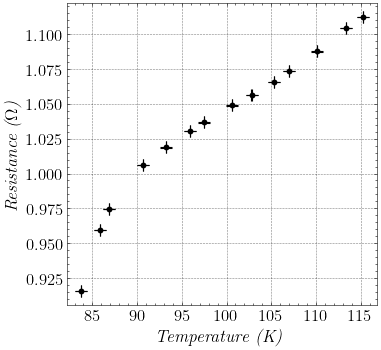

In [107]:
# NARROWING THE RANGE
x_min, x_max = 0, 116
df_study = df[(df['Temperature (K)'] >= x_min) & (df['Temperature (K)'] <= x_max)]
xdata, ydata, error_x, error_y = df_study['Temperature (K)'], df_study['Resistance ($\Omega$)'], df_study['$\Delta$ T (K)'], df_study['$\Delta$ R ($\Omega$)']
ScatterPlot(xdata, ydata, error_x, error_y, 'purple', 'Temperature (K)', 'Resistance ($\Omega$)')

### Warming 2

In [100]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1nEmzrUnEoUVvY7IwUPwiF5Lh4ofI0ZTwf0R9cI0LgEQ'
workSheetName = 'Warming_2'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :4]

# ADDING UNCERTAINTIES ---------------------------------------
df['$\Delta$ V (mV)'], df['$\Delta$ I (mA)'], df['$\Delta$ T (K)'] = 0.01, 0.01, 0.01
df['$\Delta$ R ($\Omega$)'] = df.apply(lambda x: uncertainty_var([x['Voltage (mV)'], x['I (mA)']], [x['$\Delta$ V (mV)'], x['$\Delta$ I (mA)']], calculate_R), axis=1)
df.head(5)

,Voltage (mV),I (mA),Resistance ($\Omega$),Temperature (K),$\Delta$ V (mV),$\Delta$ I (mA),$\Delta$ T (K),$\Delta$ R ($\Omega$)
0,54.7677,101.6158,0.538968,83.70,0.01,0.01,0.01,0.000112
1,55.8299,101.6029,0.549491,86.79,0.01,0.01,0.01,0.000112
2,56.6143,101.5936,0.557262,90.06,0.01,0.01,0.01,0.000113
3,57.1081,101.5895,0.562146,93.67,0.01,0.01,0.01,0.000113
4,58.1472,101.5742,0.572460,96.50,0.01,0.01,0.01,0.000113


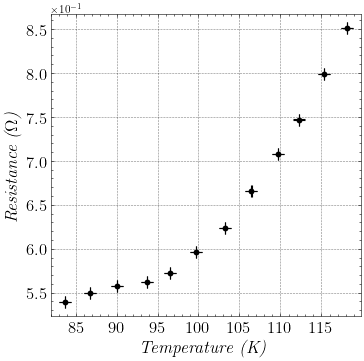

In [101]:
# PLOTTING OUR DATA
xdata, ydata, error_x, error_y = df['Temperature (K)'], df['Resistance ($\Omega$)'], df['$\Delta$ T (K)'], df['$\Delta$ R ($\Omega$)']
ScatterPlot(xdata, ydata, error_x, error_y, 'purple', 'Temperature (K)', 'Resistance ($\Omega$)')

***
### <font color=green>BUCKET 2</font>
***

In [108]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1pHs-85bj01AfIPusguxF8gA3gpEA9Za05DwKKUnjv5s'
workSheetName = 'Cooling_1'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :4]

# ADDING UNCERTAINTIES ---------------------------------------
df['$\Delta$ V (mV)'], df['$\Delta$ I (mA)'], df['$\Delta$ T (K)'] = 0.01, 0.01, 0.01
df['$\Delta$ R ($\Omega$)'] = df.apply(lambda x: uncertainty_var([x['Voltage (mV)'], x['I (mA)']], [x['$\Delta$ V (mV)'], x['$\Delta$ I (mA)']], calculate_R), axis=1)
df.head(5)

,Voltage (mV),I (mA),Resistance ($\Omega$),Temperature (K),$\Delta$ V (mV),$\Delta$ I (mA),$\Delta$ T (K),$\Delta$ R ($\Omega$)
0,-0.0094,99.3407,0.000095,85.74,0.01,0.01,0.01,0.000101
1,-0.0107,99.4477,0.000108,90.86,0.01,0.01,0.01,0.000101
2,-0.0139,99.4259,0.000140,95.96,0.01,0.01,0.01,0.000101
3,-0.0183,99.2283,0.000184,100.79,0.01,0.01,0.01,0.000101
4,-0.0142,99.4138,0.000143,105.79,0.01,0.01,0.01,0.000101


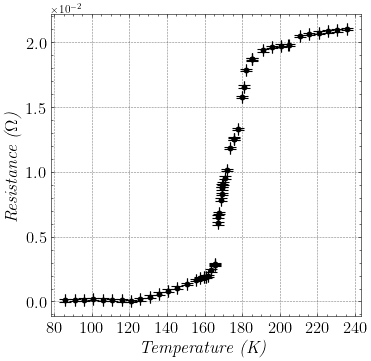

In [109]:
# PLOTTING OUR DATA
xdata, ydata, error_x, error_y = df['Temperature (K)'], df['Resistance ($\Omega$)'], df['$\Delta$ T (K)'], df['$\Delta$ R ($\Omega$)']
ScatterPlot(xdata, ydata, error_x, error_y, 'purple', 'Temperature (K)', 'Resistance ($\Omega$)')

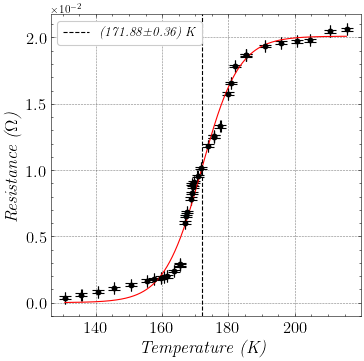

Corresponding p-value: 0.0
Degrees of freedom: 35


In [114]:
# FITTING OUR FUNCTION
x_min, x_max = 130, 220
df_study = df[(df['Temperature (K)'] >= x_min) & (df['Temperature (K)'] <= x_max)]
xdata, ydata, error_x, error_y = df_study['Temperature (K)'], df_study['Resistance ($\Omega$)'], df_study['$\Delta$ T (K)'], df_study['$\Delta$ R ($\Omega$)']
FUNCTION_FIT(xdata, ydata, error_x, error_y, 'red', 'Temperature (K)', 'Resistance ($\Omega$)', Sigmoid)